# Quadratic Programming

Suppose we want to minimize the Euclidean distance of the solution to the origin while subject to linear constraints. This will require a quadratic objective function. Consider this example problem:

> **min** $\frac{1}{2}\left(x^2 + y^2 \right)$

> *subject to*

> $x + y = 2$

> $x \ge 0$

> $y \ge 0$

This problem can be visualized graphically:

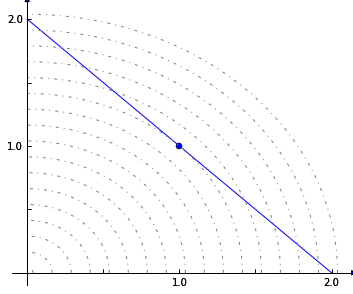

In [1]:
%matplotlib inline
import plot_helper

plot_helper.plot_qp1()

The objective can be rewritten as $\frac{1}{2} v^T \cdot \mathbf Q \cdot v$, where
$v = \left(\begin{matrix} x \\ y\end{matrix} \right)$ and
$\mathbf Q = \left(\begin{matrix} 1 & 0\\ 0 & 1 \end{matrix}\right)$

The matrix $\mathbf Q$ can be passed into a cobra model as the quadratic objective.

In [2]:
import scipy

from cobra import Reaction, Metabolite, Model, solvers

The quadratic objective $\mathbf Q$ should be formatted as a scipy sparse matrix.

In [3]:
Q = scipy.sparse.eye(2).todok()
Q

<2x2 sparse matrix of type '<type 'numpy.float64'>'
	with 2 stored elements in Dictionary Of Keys format>

In this case, the quadratic objective is simply the identity matrix

In [4]:
Q.todense()

matrix([[ 1.,  0.],
        [ 0.,  1.]])

We need to use a solver that supports quadratic programming, such as gurobi or cplex. If a solver which supports quadratic programming is installed, this function will return its name.

In [5]:
print(solvers.get_solver_name(qp=True))

gurobi


In [6]:
c = Metabolite("c")
c._bound = 2
x = Reaction("x")
y = Reaction("y")
x.add_metabolites({c: 1})
y.add_metabolites({c: 1})
m = Model()
m.add_reactions([x, y])
sol = m.optimize(quadratic_component=Q, objective_sense="minimize")
sol.x_dict

{'x': 1.0, 'y': 1.0}

Suppose we change the problem to have a mixed linear and quadratic objective.

> **min** $\frac{1}{2}\left(x^2 + y^2 \right) - y$

> *subject to*

> $x + y = 2$

> $x \ge 0$

> $y \ge 0$

Graphically, this would be

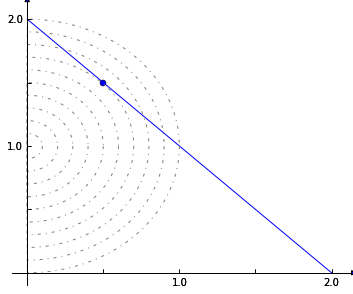

In [7]:
plot_helper.plot_qp2()

QP solvers in cobrapy will combine linear and quadratic coefficients. The linear portion will be obtained from the same objective_coefficient attribute used with LP's.

In [8]:
y.objective_coefficient = -1
sol = m.optimize(quadratic_component=Q, objective_sense="minimize")
sol.x_dict

{'x': 0.5, 'y': 1.5}